In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import pickle
from rocchio_filter import Lyric_Rocchio_Feedback
import warnings
warnings.filterwarnings("ignore")

In [2]:
# the goal of this notebook is to prove that the model is working.
rff = Lyric_Rocchio_Feedback()

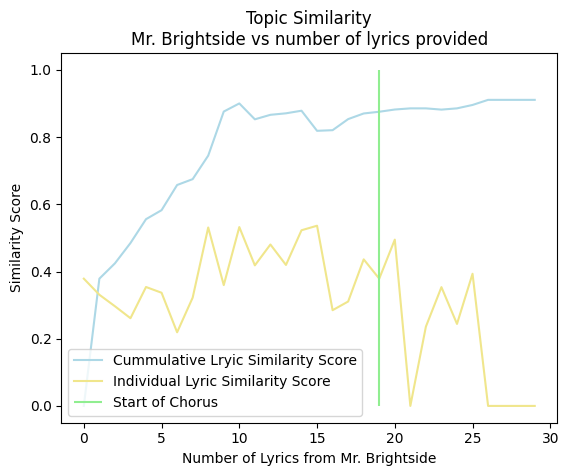

In [43]:
with open('mrbrightside.txt') as unit_test_lyrics:
    lyrics = unit_test_lyrics.readlines()

full_lyrics = ' '.join(set(' '.join(lyrics).split()))
rff.userSearch(full_lyrics)
full_lyric_vector = rff.query
simVals = []
singleVals = []
for i in range(len(lyrics)):
    temp_lyrics = ' '.join(lyrics[:i])
    temp_lyric = lyrics[i]
    rff.userSearch(temp_lyrics)
    simVals.append(cosine_similarity(rff.query, full_lyric_vector)[0][0])
    rff.userSearch(temp_lyric)
    singleVals.append(cosine_similarity(rff.query, full_lyric_vector)[0][0])

plt.plot(range(len(simVals)), simVals, color='lightblue', label='Cummulative Lryic Similarity Score')
plt.plot(range(len(simVals)), singleVals, color='khaki', label='Individual Lyric Similarity Score')
plt.title('Topic Similarity\nMr. Brightside vs number of lyrics provided')
plt.ylabel('Similarity Score')
plt.xlabel('Number of Lyrics from Mr. Brightside')
plt.vlines(19, 0, 1.0, color='lightgreen', label='Start of Chorus')
plt.legend()


In [135]:
# grouping songs by their dominant topic.
rff = Lyric_Rocchio_Feedback()
track_vecs = rff.lyric_vec_dict
# get index of highest value for each track
track_topic_dict = {track_id: [np.argsort(-track_vecs[track_id])[0], track_vecs[track_id][np.argsort(-track_vecs[track_id])[0]]] for track_id in track_vecs.keys()}
track_topic_dict
topsRepped = [topic[0] for topic in track_topic_dict.values()]
from collections import defaultdict, Counter
topTopics = Counter(topsRepped).most_common(3)
bottomTopics = Counter(topsRepped).most_common()[48:50]
topic_track_mag_dict = defaultdict(list)
# pivot the dictionary so that the key is topic and the contents are song and magnitude
for track in track_topic_dict:
    topic_track_mag_dict[track_topic_dict[track][0]].append((track, track_topic_dict[track][1]))
# now go and get the top 10 songs for each topic:
top_tracks_dict = defaultdict(list)
for topic in topic_track_mag_dict:
    top_tracks_dict[topic] = sorted(topic_track_mag_dict[topic], key=lambda tup: tup[1], reverse=True)[0:10]
tracks_id_df = rff.all_tracks_df[['track_id', 'track_name', 'artist_name']]
for topic in top_tracks_dict:
    top_tracks_dict[topic] = [tracks_id_df[tracks_id_df['track_id']==track_id[0]][['track_name','artist_name']].values for track_id in top_tracks_dict[topic]]
top_tracks_dict
# now evaluate the 5 most common topics and the five least common topics
topTracks_df = pd.DataFrame()
for top_tracks in topTopics + bottomTopics:
    topTracks_df[top_tracks[0]] = top_tracks_dict[top_tracks[0]]
# select a random topic, topic 15 and add that to the list
topTracks_df[15] = top_tracks_dict[15]
# this dataframe shows the top 10 tracks for each topic sampled.
topTracks_df


,0,1,17,21,35,15
0,"[[We Found Love, Michael Shynes]]","[[Love Is Everywhere, Pharoah Sanders]]","[[In the Midst of It All, Tom Misch]]","[[Nothing On Us, The Him]]","[[Salted Caramel Ice Cream, Metronomy]]","[[Organ Donor, Zomboy]]"
1,"[[Worst Love, Robosonic]]","[[Love Medley, Shana Wilson]]","[[The Garden, Mirah]]","[[I Ain't Over You, Sneaky Sound System]]","[[Is There Life Out There, Reba McEntire]]","[[You Already Know, Paul Woolford]]"
2,"[[Do It Nation, Half Japanese]]","[[Love Cry, Four Tet]]","[[Riot on the Dancefloor, Groove Coverage]]","[[Anything I Do (feat. Ms Banks & Alika), CLiQ]]","[[Change Your Life (You Can Do It), Dan Deacon]]","[[I'll Be Around, The Spinners]]"
3,"[[Can't Take My Eyes Off You, La Discothèque]]","[[Love S.O.S. (WWW), Justice]]","[[My My My - Funktuary Radio Mix, Armand Van H...","[[You Got Me, Gavin DeGraw]]","[[Blood Fire, The Nextmen]]","[[I'll Be Around, Joan Osborne]]"
4,"[[Work That, Project 98]]","[[Without You, Brooks]]","[[Out of Love (feat. Cosmos & Creature), Two F...","[[Uncharted, Kensington]]","[[Confidence, Ocean Alley]]","[[All I Want, Passion Pit]]"
5,"[[Subtraction Blues, Mike Zito]]","[[Why I Love You, MAJOR.]]","[[Somebody Gon Get It, Timeflies]]","[[Children, Avera]]","[[She's Just Killing Me, ZZ Top]]","[[Christmas Kids, Roar]]"
6,"[[Here Comes The Sun - Remastered 2009, The Be...","[[Gimmie Love, Carly Rae Jepsen]]","[[Fireflies, April Kry]]","[[Ringin' In My Head, Black Stone Cherry]]","[[Computer Camp Love, Datarock]]","[[Back for More, Cool Million]]"
7,[[Moody's Mood For Love (I'm In The Mood For L...,"[[To Love (feat. Shannon Saunders), Sonny Fode...","[[Oh!, The Linda Lindas]]","[[By The Grace Of God, The Hellacopters]]","[[Love Spreads, The Stone Roses]]","[[By Your Side, Mike Perry]]"
8,"[[My Life, Lisa Page Brooks]]","[[Summertime Magic, Childish Gambino]]","[[Delirium, Lacuna Coil]]","[[My Way, Soon, Greta Van Fleet]]","[[Life Goes On, The Damned]]","[[While We're Young, Jhené Aiko]]"
9,"[[Smoke Gets In Your Eyes, Atlantic Five Jazz ...","[[Give Me Your Love, Sigala]]","[[Never Go Back, Grace Potter & The Nocturnals]]","[[We Got The Beat, The Go-Go's]]","[[[Insert Girl's Name Here], The Luka State]]","[[First To Go, Andromedik]]"
